Mrinmayee Gokhale 
RollNo 10
PRN: 1032232136
ML Lab Assg 01

EDA

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, chi2


In [77]:
df = pd.read_csv('loan_approval_data.csv',encoding='unicode_escape')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sr. No           30 non-null     int64  
 1   Age              30 non-null     int64  
 2   Employment_Type  30 non-null     object 
 3   Income           30 non-null     float64
 4   Credit_Score     30 non-null     int64  
 5   Existing_Loans   30 non-null     int64  
 6   Loan_Approved    30 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ KB


In [79]:

df.head()

,Sr. No,Age,Employment_Type,Income,Credit_Score,Existing_Loans,Loan_Approved
0,1,29,Unemployed,8.8,532,2,0
1,2,28,Self-Employed,8.1,741,3,0
2,3,34,Salaried,5.9,699,3,0
3,4,59,Salaried,7.6,636,1,1
4,5,58,Salaried,9.2,515,0,0


In [80]:
df.tail()

,Sr. No,Age,Employment_Type,Income,Credit_Score,Existing_Loans,Loan_Approved
25,26,50,Unemployed,2.2,617,1,0
26,27,56,Unemployed,3.4,546,2,0
27,28,23,Unemployed,2.6,508,3,0
28,29,21,Self-Employed,4.0,556,1,0
29,30,43,Self-Employed,2.6,581,2,0


In [81]:
df.describe()

,Sr. No,Age,Income,Credit_Score,Existing_Loans,Loan_Approved
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,42.266667,6.106667,641.300000,1.733333,0.166667
std,8.803408,12.401149,2.386735,100.238732,1.080655,0.379049
min,1.000000,21.000000,2.200000,506.000000,0.000000,0.000000
25%,8.250000,31.250000,3.925000,555.250000,1.000000,0.000000
50%,15.500000,44.500000,6.050000,636.500000,2.000000,0.000000
75%,22.750000,53.000000,7.975000,708.750000,3.000000,0.000000
max,30.000000,59.000000,9.900000,845.000000,3.000000,1.000000


In [82]:
df.iloc[3:12] #row 4 to 12

,Sr. No,Age,Employment_Type,Income,Credit_Score,Existing_Loans,Loan_Approved
3,4,59,Salaried,7.6,636,1,1
4,5,58,Salaried,9.2,515,0,0
5,6,22,Unemployed,6.3,695,1,0
6,7,48,Unemployed,2.2,613,3,0
7,8,52,Unemployed,3.9,618,1,0
8,9,50,Self-Employed,9.4,713,0,1
9,10,32,Unemployed,9.9,651,0,0
10,11,42,Unemployed,9.8,756,3,0
11,12,53,Unemployed,3.5,645,3,0


In [83]:
df.head(19) #first 19 rows

,Sr. No,Age,Employment_Type,Income,Credit_Score,Existing_Loans,Loan_Approved
0,1,29,Unemployed,8.8,532,2,0
1,2,28,Self-Employed,8.1,741,3,0
2,3,34,Salaried,5.9,699,3,0
3,4,59,Salaried,7.6,636,1,1
4,5,58,Salaried,9.2,515,0,0
5,6,22,Unemployed,6.3,695,1,0
6,7,48,Unemployed,2.2,613,3,0
7,8,52,Unemployed,3.9,618,1,0
8,9,50,Self-Employed,9.4,713,0,1
9,10,32,Unemployed,9.9,651,0,0


In [84]:
# 1. Identify missing values for each row
missing_per_row = df.isnull().sum(axis=1)
print("Missing values per row:")
print(missing_per_row)

Missing values per row:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64


In [85]:
# 2. Total count of missing values per row
total_missing_count = df.isnull().sum(axis=1).value_counts()
print("\nTotal missing count per row:")
print(total_missing_count)


Total missing count per row:
0    30
Name: count, dtype: int64


In [86]:
# 3. Display any one numeric attribute – AGE
age_column_name = df.columns[df.columns.str.lower() == 'age'][0]
age_column_index = df.columns.get_loc(age_column_name)
print(f"\nNumeric Attribute: {age_column_name}")
print(f"Column Index: {age_column_index}")
print(df[age_column_name].describe())


Numeric Attribute: Age
Column Index: 1
count    30.000000
mean     42.266667
std      12.401149
min      21.000000
25%      31.250000
50%      44.500000
75%      53.000000
max      59.000000
Name: Age, dtype: float64


In [87]:
#Drop duplicates
df_no_duplicates = df.drop_duplicates()

In [88]:
# 5. Replace missing values
df_imputed = df_no_duplicates.copy()


In [89]:
# Imputation with mean (numeric)
numeric_cols = df_imputed.select_dtypes(include=[np.number]).columns
mean_imputer = SimpleImputer(strategy='mean')
df_imputed[numeric_cols] = mean_imputer.fit_transform(df_imputed[numeric_cols])

In [90]:
# Zero imputation (illustration)
df_zero_imputed = df_no_duplicates.fillna(0)

In [91]:

# Compute measures
measures = pd.DataFrame(index=num_cols, columns=["Mean", "Median", "Mode", "Variance", "Std Dev"])
for col in num_cols:
    measures.loc[col] = [
        df[col].mean(),
        df[col].median(),
        df[col].mode()[0],
        df[col].var(),
        df[col].std()
    ]
measures


,Mean,Median,Mode,Variance,Std Dev
Age,42.266667,44.5,53,153.788506,12.401149
Income,6.106667,6.05,2.2,5.696506,2.386735
Credit_Score,641.3,636.5,515,10047.803448,100.238732
Existing_Loans,1.733333,2.0,1,1.167816,1.080655


In [92]:
# Central tendency - mean, median, mode
df_mean_filled = df_no_duplicates.fillna(df_no_duplicates.mean(numeric_only=True))
df_median_filled = df_no_duplicates.fillna(df_no_duplicates.median(numeric_only=True))
df_mode_filled = df_no_duplicates.fillna(df_no_duplicates.mode().iloc[0])


## Central Tendency & Dispersion
Formulas:
- Mean = (1/n) Σ xᵢ
- Median = middle sorted value
- Mode = most frequent value
- Variance (sample) = Σ(xᵢ - x̄)² / (n-1)
- Standard deviation = √Variance

In [93]:
# 6. Split the data into independent (X) and dependent (y) variables
# Assuming 'Loan_Approved' is the target
X = df_imputed.drop(columns=['Loan_Approved'])
y = df_imputed['Loan_Approved']

print("\nIndependent variables (X):")
print(X.head())

print("\nDependent variable (y):")
print(y.head())



Independent variables (X):
   Sr. No   Age Employment_Type  Income  Credit_Score  Existing_Loans
0     1.0  29.0      Unemployed     8.8         532.0             2.0
1     2.0  28.0   Self-Employed     8.1         741.0             3.0
2     3.0  34.0        Salaried     5.9         699.0             3.0
3     4.0  59.0        Salaried     7.6         636.0             1.0
4     5.0  58.0        Salaried     9.2         515.0             0.0

Dependent variable (y):
0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: Loan_Approved, dtype: float64


In [94]:
df = df_mean_filled

In [95]:
# Make a copy to preserve the original
df_encoding = df.copy()

# Select categorical columns (you can manually list them if needed)
cat_columns = df_encoding.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", cat_columns)

Categorical columns: ['Employment_Type']


In [96]:
# ----- One-Hot Encoding -----
# Using pandas get_dummies
df_onehot = pd.get_dummies(df_encoding[cat_columns])
print("One-Hot Encoded Shape:", df_onehot.shape)

One-Hot Encoded Shape: (30, 3)


In [97]:
# ----- Label Encoding -----
# Apply label encoding to each categorical column
le = LabelEncoder()
df_label_encoded = df_encoding[cat_columns].apply(lambda col: le.fit_transform(col.astype(str)))
print("Label Encoded Data:\n", df_label_encoded.head())

Label Encoded Data:
    Employment_Type
0                2
1                1
2                0
3                0
4                0


In [98]:
# Select only numerical columns
num_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", num_columns)

Numerical columns: ['Sr. No', 'Age', 'Income', 'Credit_Score', 'Existing_Loans', 'Loan_Approved']


In [99]:
# ----- Min-Max Normalization -----
minmax = MinMaxScaler()
df_minmax = pd.DataFrame(minmax.fit_transform(df[num_columns]), columns=num_columns)
print("Min-Max Normalized Data:\n", df_minmax.head())

Min-Max Normalized Data:
      Sr. No       Age    Income  Credit_Score  Existing_Loans  Loan_Approved
0  0.000000  0.210526  0.857143      0.076696        0.666667            0.0
1  0.034483  0.184211  0.766234      0.693215        1.000000            0.0
2  0.068966  0.342105  0.480519      0.569322        1.000000            0.0
3  0.103448  1.000000  0.701299      0.383481        0.333333            1.0
4  0.137931  0.973684  0.909091      0.026549        0.000000            0.0


In [100]:
# ----- Z-Score Normalization -----
zscore = StandardScaler()
df_zscore = pd.DataFrame(zscore.fit_transform(df[num_columns]), columns=num_columns)
print("Z-Score Normalized Data:\n", df_zscore.head())

Z-Score Normalized Data:
      Sr. No       Age    Income  Credit_Score  Existing_Loans  Loan_Approved
0 -1.675247 -1.088082  1.147750     -1.109037        0.250982      -0.447214
1 -1.559712 -1.170098  0.849449      1.011629        1.192166      -0.447214
2 -1.444178 -0.678001 -0.088070      0.585466        1.192166      -0.447214
3 -1.328644  1.372405  0.636376     -0.053778       -0.690201       2.236068
4 -1.213110  1.290388  1.318208     -1.281532       -1.631385      -0.447214


In [101]:
# Display column names
print(df.columns.tolist())


['Sr. No', 'Age', 'Employment_Type', 'Income', 'Credit_Score', 'Existing_Loans', 'Loan_Approved']


In [102]:
# Separate numeric & categorical
df = df.drop(columns=["Sr. No"])
num_cols = df.select_dtypes(include=[np.number]).drop(columns=["Loan_Approved"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

num_cols, cat_cols


(['Age', 'Income', 'Credit_Score', 'Existing_Loans'], ['Employment_Type'])

Visualizations

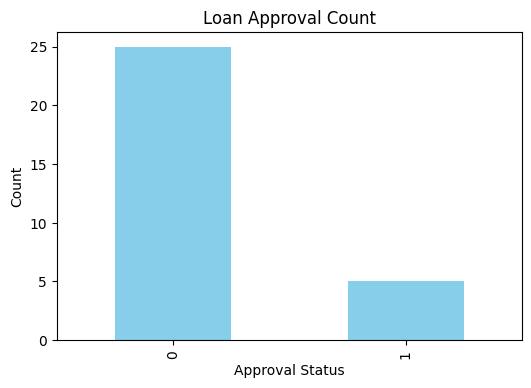

In [103]:
# Bar Graph - Count of Loan Status
plt.figure(figsize=(6,4))
df['Loan_Approved'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Loan Approval Count")
plt.xlabel("Approval Status")
plt.ylabel("Count")
plt.show()

# Inference: Shows the distribution of approved vs not approved loans

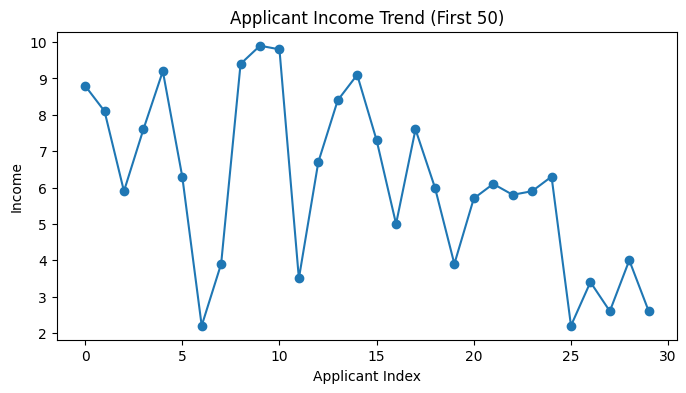

In [104]:
# Line Plot: Income (first 50 entries)
plt.figure(figsize=(8,4))
plt.plot(df['Income'][:50], marker='o', linestyle='-')
plt.title("Applicant Income Trend (First 50)")
plt.xlabel("Applicant Index")
plt.ylabel("Income")
plt.show()
# Inference: Wide income variation

## Univariate Analysis
Histograms & countplots to show distribution

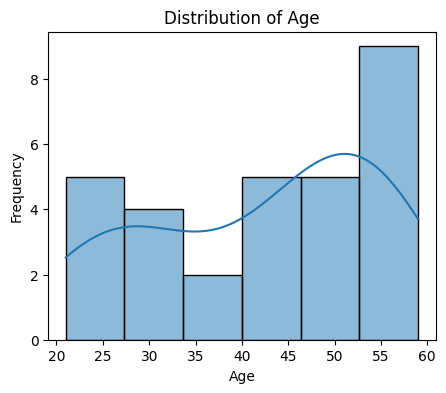

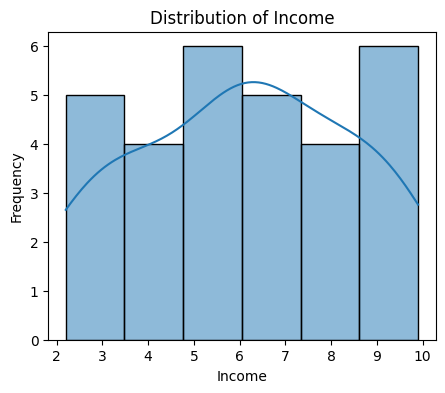

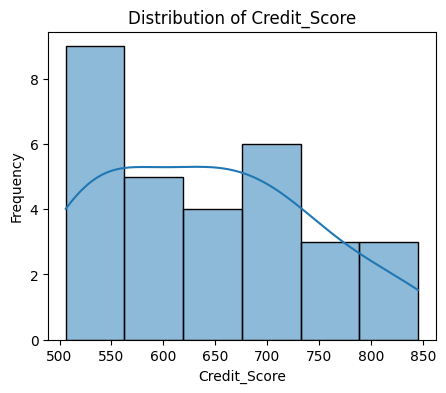

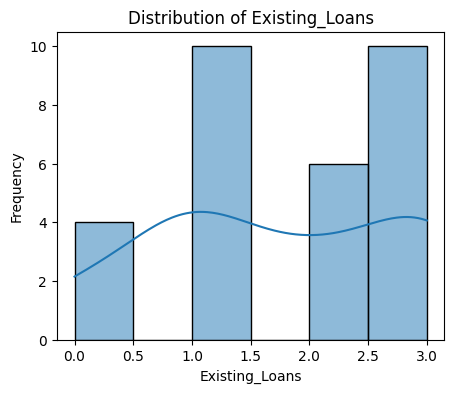

In [ ]:

for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Age Inference: Most applicants are in 25-35 age range
# Income Inference: Wide income variation
# Credit Score Inference: Most scores are above 600, indicating good creditworthiness
# Loan Amount Inference: Most loans are below 500,000, with few high-value loans


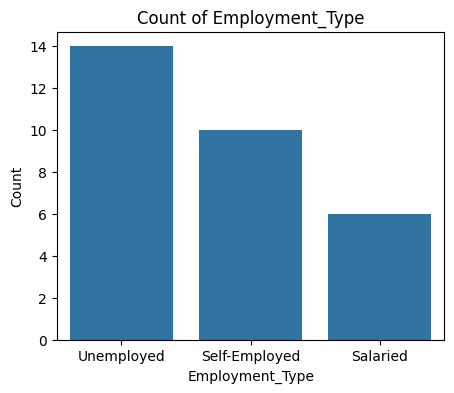

In [ ]:

for col in cat_cols:
    plt.figure(figsize=(5,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Inference: Most applicants are unemployed, followed by self-employed, with salaried individuals being the least common.


## Bivariate Analysis
Scatterplots, boxplots, and heatmap

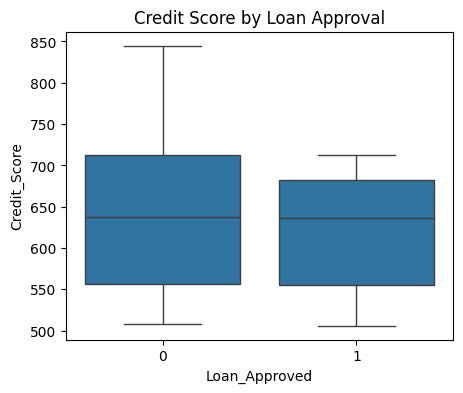

In [ ]:

# Boxplot: credit score vs loan approval
plt.figure(figsize=(5,4))
sns.boxplot(x="Loan_Approved", y="Credit_Score", data=df)
plt.title("Credit Score by Loan Approval")
plt.show()
# Inference: Higher credit scores tend to be associated with loan approval

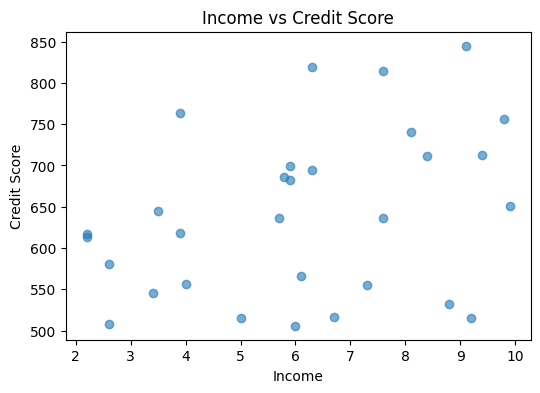

In [107]:
# Scatter Plot: Income vs Credit Score
plt.figure(figsize=(6,4))
plt.scatter(df['Income'], df['Credit_Score'], alpha=0.6)
plt.title("Income vs Credit Score")
plt.xlabel("Income")
plt.ylabel("Credit Score")
plt.show()
# Inference: High income does not always mean high credit score


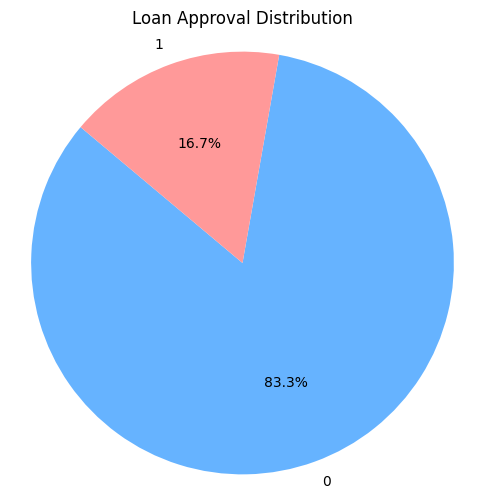

In [108]:
# Pie Chart - Loan Approval
loan_counts = df['Loan_Approved'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Loan Approval Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

# Inference: Visualizes proportion of approved vs not approved loans

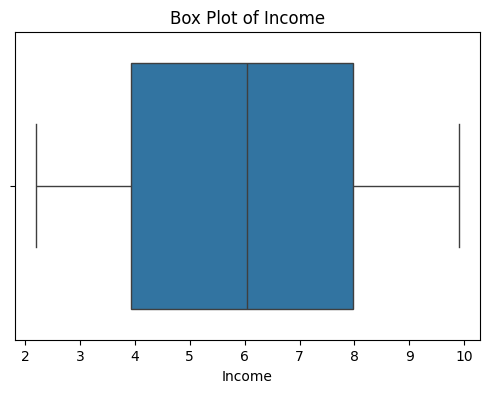

In [109]:
# Box Plot: Income
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Income'])
plt.title("Box Plot of Income")
plt.show()
# Inference: Shows outliers in income


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23712\1541215930.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Credit_Score'], shade=True, color='green')


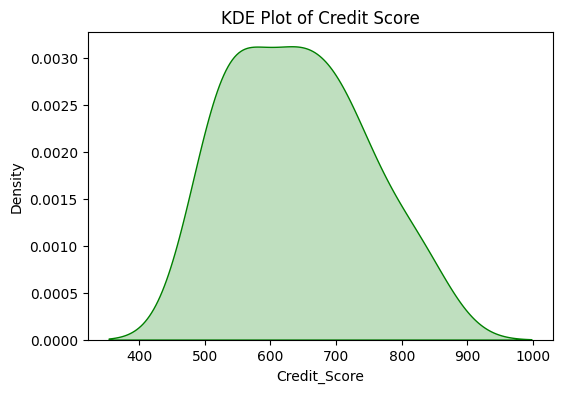

In [110]:
# KDE Plot: Credit Score
plt.figure(figsize=(6,4))
sns.kdeplot(df['Credit_Score'], shade=True, color='green')
plt.title("KDE Plot of Credit Score")
plt.show()
# Inference: Distribution is slightly skewed


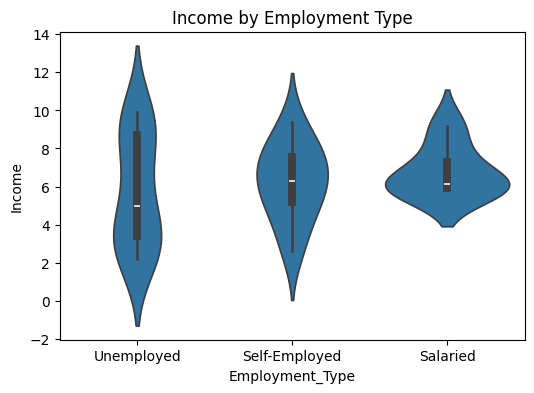

In [111]:
# Violin Plot: Employment Type vs Income
plt.figure(figsize=(6,4))
sns.violinplot(x='Employment_Type', y='Income', data=df)
plt.title("Income by Employment Type")
plt.show()
# Inference: Some employment types have broader income spread


                     Age    Income  Credit_Score  Existing_Loans  \
Age             1.000000 -0.160020     -0.052661       -0.089715   
Income         -0.160020  1.000000      0.334062       -0.265337   
Credit_Score   -0.052661  0.334062      1.000000        0.140511   
Existing_Loans -0.089715 -0.265337      0.140511        1.000000   
Loan_Approved   0.056241  0.215988     -0.103915       -0.224485   

                Loan_Approved  
Age                  0.056241  
Income               0.215988  
Credit_Score        -0.103915  
Existing_Loans      -0.224485  
Loan_Approved        1.000000  


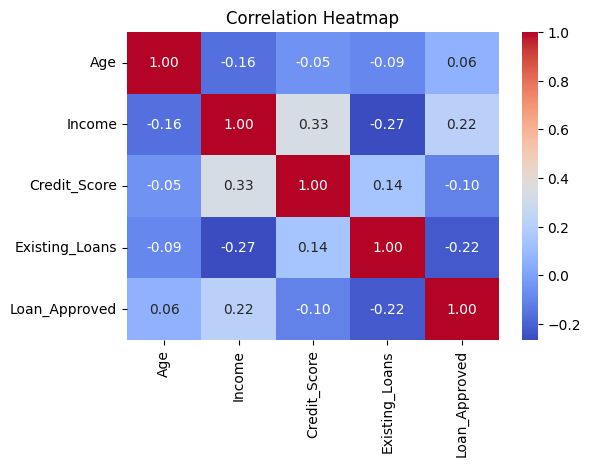

In [112]:
# Only numeric columns
num_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_df.corr()

# Pearson Correlation matrix
print(corr_matrix)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
# Inference: See how Age, Income, Credit Score, etc. relate


In [115]:
# Encode categorical target + Employment Type
df_enc = df.copy()
le = LabelEncoder()
df_enc['Loan_Approved'] = le.fit_transform(df_enc['Loan_Approved'])  # Target
df_enc['Employment_Type'] = le.fit_transform(df_enc['Employment_Type'])  # Feature

# Features and target
X = df_enc.drop(columns=['Loan_Approved'])
y = df_enc['Loan_Approved']

# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')
fit = selector.fit(X, y)

# Create DataFrame of feature scores
scores_df = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})
scores_df = scores_df.sort_values(by='Score', ascending=False)
print(scores_df)


           Feature     Score
1  Employment_Type  4.912281
4   Existing_Loans  1.485904
2           Income  1.370144
3     Credit_Score  0.305651
0              Age  0.088846


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23712\2465669519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=scores_df, x='Score', y='Feature', palette='mako')


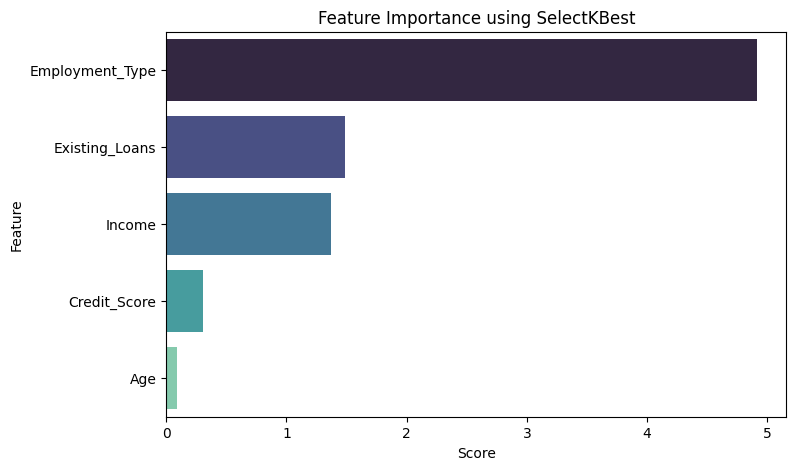

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(data=scores_df, x='Score', y='Feature', palette='mako')
plt.title("Feature Importance using SelectKBest")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.show()
# Inference: Features with higher score contribute more to loan approval decision


In [ ]:
df

,Sr. No,Age,Employment_Type,Income,Credit_Score,Existing_Loans,Loan_Approved
0,1,29,Unemployed,8.8,532,2,0
1,2,28,Self-Employed,8.1,741,3,0
2,3,34,Salaried,5.9,699,3,0
3,4,59,Salaried,7.6,636,1,1
4,5,58,Salaried,9.2,515,0,0
5,6,22,Unemployed,6.3,695,1,0
6,7,48,Unemployed,2.2,613,3,0
7,8,52,Unemployed,3.9,618,1,0
8,9,50,Self-Employed,9.4,713,0,1
9,10,32,Unemployed,9.9,651,0,0


In [118]:
# # Encode categorical variables
# X_encoded = X.copy()
# for col in X_encoded.select_dtypes(include=['object']).columns:
#     le = LabelEncoder()
#     X_encoded[col] = le.fit_transform(X_encoded[col])

# Chi-square feature selection
chi_scores = SelectKBest(score_func=chi2, k='all').fit(df_label_encoded, y)
chi_df = pd.DataFrame({
    "Feature": df_label_encoded.columns,
    "Chi2 Score": chi_scores.scores_
})

print(chi_df)

           Feature  Chi2 Score
0  Employment_Type    2.105263
